# Breast Cancer Wisconsin

Create a model that predicts whether a biopsied breast cell is benign or malignant.

Data Set Homepage:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29

Data were downloaded from the UC Irvine Machine Learning Repository:
https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data

Data description:
https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names



In [83]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [2]:
#http://matplotlib.org/users/customizing.html
font = {'family' : 'Times',
        'weight' : 'normal',
        'size'   : 18.}

plt.rc('font', **font)  # pass in the font dict as kwargs
axes = {'labelsize' : 12.,
        'linewidth' : 2.,
        'labelweight' : 'normal'}
plt.rc('axes', **axes)  # pass in the font dict as kwargs
plt.rc('text', usetex=False)
#plt.rcdefaults()

%matplotlib inline
%load_ext autoreload
%autoreload 2
# %reload_ext autoreload

myfigsize = (12.0, 8.0)
myfontsize = 10.
plt.rcParams['figure.figsize'] = myfigsize

In [303]:
df = pd.read_csv('../data/uwbc_data.txt',
                names=['code', 'thick', 'size_unif', 'shape_unif', 'adhesion',
                      'size', 'bare_nuc', 'bland_chrom', 'normal_nuc', 'mitoses', 'class'])

colnms = ['code',
          'clump thickness',
         'Unif of Cell Size',
         'Unif of Cell Shape',
         'Marginal Adhesion',
         'Single Epi Cell Size',
         'Bare Nuclei',
         'Bland Chromatin',
         'Normal Nucleoli',
         'Mitoses',
         'Class']
#class:
#benign (good) = 2
#malignant(bad) = 4

In [304]:
df.head(5)

,code,thick,size_unif,shape_unif,adhesion,size,bare_nuc,bland_chrom,normal_nuc,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [305]:
df.describe()

,code,thick,size_unif,shape_unif,adhesion,size,bland_chrom,normal_nuc,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1071704.098712,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,617095.729819,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,61634.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,870688.500000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1171710.000000,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1238298.000000,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,13454352.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


One of the columns, `bare_nuc`, was not included in the description. This was because there are non-numeric values in that column.

In [306]:
df['bare_nuc'].describe()

count     699
unique     11
top         1
freq      402
Name: bare_nuc, dtype: object

#### Inspect the Unique Values

In [307]:
for colnm in df.columns.values[1:]:
    print(colnm, df[colnm].unique())

('thick', array([ 5,  3,  6,  4,  8,  1,  2,  7, 10,  9]))
('size_unif', array([ 1,  4,  8, 10,  2,  3,  7,  5,  6,  9]))
('shape_unif', array([ 1,  4,  8, 10,  2,  3,  5,  6,  7,  9]))
('adhesion', array([ 1,  5,  3,  8, 10,  4,  6,  2,  9,  7]))
('size', array([ 2,  7,  3,  1,  6,  4,  5,  8, 10,  9]))
('bare_nuc', array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'], dtype=object))
('bland_chrom', array([ 3,  9,  1,  2,  4,  5,  7,  8,  6, 10]))
('normal_nuc', array([ 1,  2,  7,  4,  5,  3, 10,  6,  9,  8]))
('mitoses', array([ 1,  5,  4,  2,  3,  7, 10,  8,  6]))
('class', array([2, 4]))


In [311]:
print(len(df))
print(len(df[df['bare_nuc'] == '?']))
print(len(df[df['bare_nuc'] == '?'])/(1.*len(df)))

699
16
0.0228898426323


**Discard values with a '?' for the first pass**

In [312]:
df = df[df['bare_nuc'] != '?'].copy()
df['bare_nuc'] = df['bare_nuc'].astype(int)

In [313]:
df.describe()

,code,thick,size_unif,shape_unif,adhesion,size,bare_nuc,bland_chrom,normal_nuc,mitoses,class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1076720.226940,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,620644.047655,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,63375.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,877617.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1171795.000000,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1238705.000000,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,13454352.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [314]:
dfd.std()

thick          2.820761
size_unif      3.065145
shape_unif     2.988581
adhesion       2.864562
size           2.223085
bare_nuc       3.643857
bland_chrom    2.449697
normal_nuc     3.052666
mitoses        1.732674
class          0.954592
dtype: float64

Now separate the DataFrame into two separate DataFrames: one with the "bad" (malignant) rows, and one with the "good" (benign) rows. 

In [315]:
bads = df[df['class'] == 4]
goods = df[df['class'] == 2]

(0, 11)

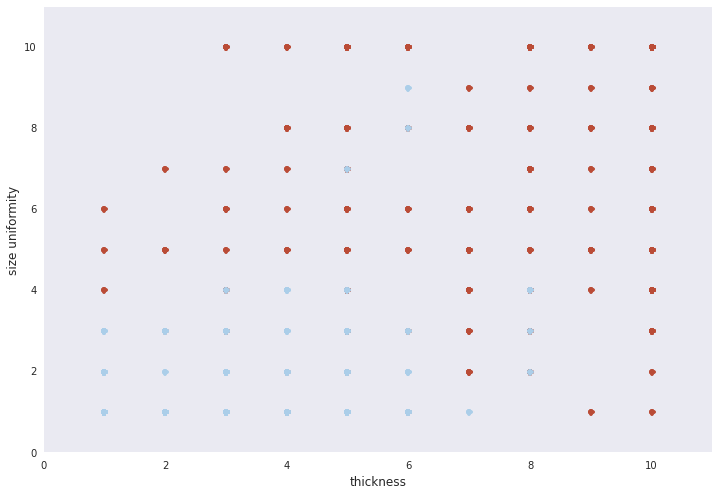

In [316]:
fig, ax = plt.subplots()
ax.plot(bads['thick'], bads['size_unif'], 'o', color='#BA4C37')
ax.plot(goods['thick'], goods['size_unif'], 'o', color='#ABCEE9')
ax.set_xlabel('thickness')
ax.set_ylabel('size uniformity')
ax.set_xlim([0, 11])
ax.set_ylim([0, 11])

In [317]:
print(bads['bare_nuc'].describe())
print('min bads: {}'.format(bads['bare_nuc'].min()))
print('max bads: {}'.format(bads['bare_nuc'].max()))
print(goods['bare_nuc'].describe())
print('min goods: {}'.format(goods['bare_nuc'].min()))
print('max goods: {}'.format(goods['bare_nuc'][pd.notnull(goods['bare_nuc'])].max()))
#pd.isnull(bads['bare_nuc'])
print(goods['bare_nuc'].unique())
print(bads['bare_nuc'].unique())

count    239.000000
mean       7.627615
std        3.116679
min        1.000000
25%        5.000000
50%       10.000000
75%       10.000000
max       10.000000
Name: bare_nuc, dtype: float64
min bads: 1
max bads: 10
count    444.000000
mean       1.346847
std        1.177848
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       10.000000
Name: bare_nuc, dtype: float64
min goods: 1
max goods: 10
[ 1 10  2  4  3  5  7  8]
[10  3  9  1  7  5  8  4  6  2]


(0, 0, 0.0, 'clump thickness')
(1, 1, 0.0, 'Unif of Cell Size')
(2, 2, 0.0, 'Unif of Cell Shape')
(3, 3, 0.0, 'Marginal Adhesion')
(4, 0, 1.0, 'Single Epi Cell Size')
(5, 1, 1.0, 'Bare Nuclei')
(6, 2, 1.0, 'Bland Chromatin')
(7, 3, 1.0, 'Normal Nucleoli')
(8, 0, 2.0, 'Mitoses')
(9, 1, 2.0, 'Class')


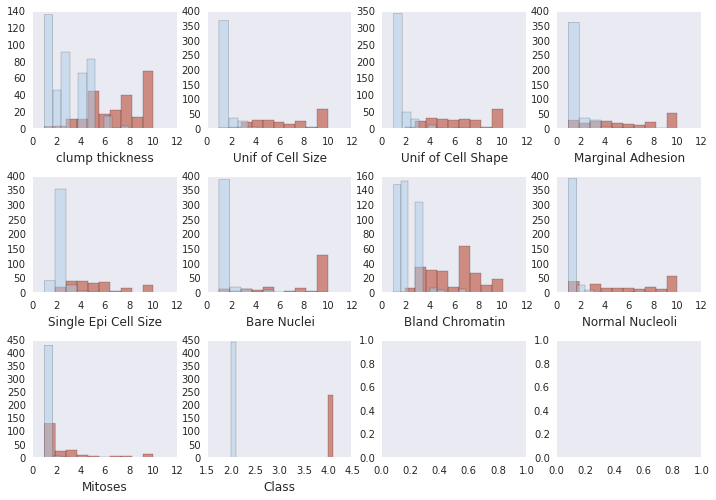

In [318]:
fig, ax = plt.subplots(3, 4)

names=['code', 'thick', 'size_unif', 'shape_unif', 'adhesion',
      'size', 'bare_nuc', 'bland_chrom', 'normal_nuc', 'mitoses', 'class']

for dim in range(len(names)-1):
    print(dim, dim % 4, np.floor(dim/4), colnms[dim+1])
    ax[np.floor(dim/4), dim % 4].hist(bads.ix[:,dim+1].values, alpha=0.6, color='#BA4C37')
    ax[np.floor(dim/4), dim % 4].hist(goods.ix[:,dim+1].values, alpha=0.5, color='#ABCEE9')
    ax[np.floor(dim/4), dim % 4].set_xlabel(colnms[dim+1])

# ax[0,0].hist(bads['thick'].values, alpha=0.6, color='#BA4C37')
# ax[0,0].hist(goods['thick'].values, alpha=0.4, color='#ABCEE9')
# ax[0,0].set_xlabel(colnms[0])

# ax[0,1].hist(bads['size_unif'].values, alpha=0.6, color='#BA4C37')
# ax[0,1].hist(goods['size_unif'].values, alpha=0.4, color='#ABCEE9')
# ax[0,1].set_xlabel(colnms[1])

# ax[0,2].hist(bads['shape_unif'].values, alpha=0.6, color='#BA4C37')
# ax[0,2].hist(goods['shape_unif'].values, alpha=0.4, color='#ABCEE9')
# ax[0,2].set_xlabel(colnms[2])

# ax[0,3].hist(bads['size_unif'].values, alpha=0.6, color='#BA4C37')
# ax[0,3].hist(goods['size_unif'].values, alpha=0.4, color='#ABCEE9')
# ax[0,3].set_xlabel(colnms[3])

# ax[1,0].hist(bads.ix[:,4].values, alpha=0.6, color='#BA4C37')
# ax[1,0].hist(goods.ix[:,4].values, alpha=0.4, color='#ABCEE9')
# ax[1,0].set_xlabel(colnms[4])

fig.subplots_adjust(hspace=0.4)

The above shows the univariate distributions for both the "goods" and "bads" for each parameter. We can accomplish the same thing quite easily either directly, with the `hist` method for pandas DataFrames, or with Seaborn.

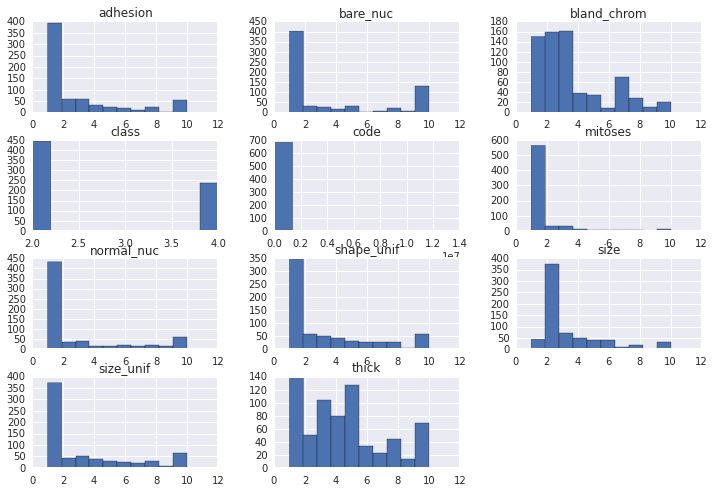

In [319]:
dum = df.hist()

#### Now Create the Seaborn Pairplot

In [320]:
# remove the "code" column
cols = df.columns
dfd = df[cols[1:]]

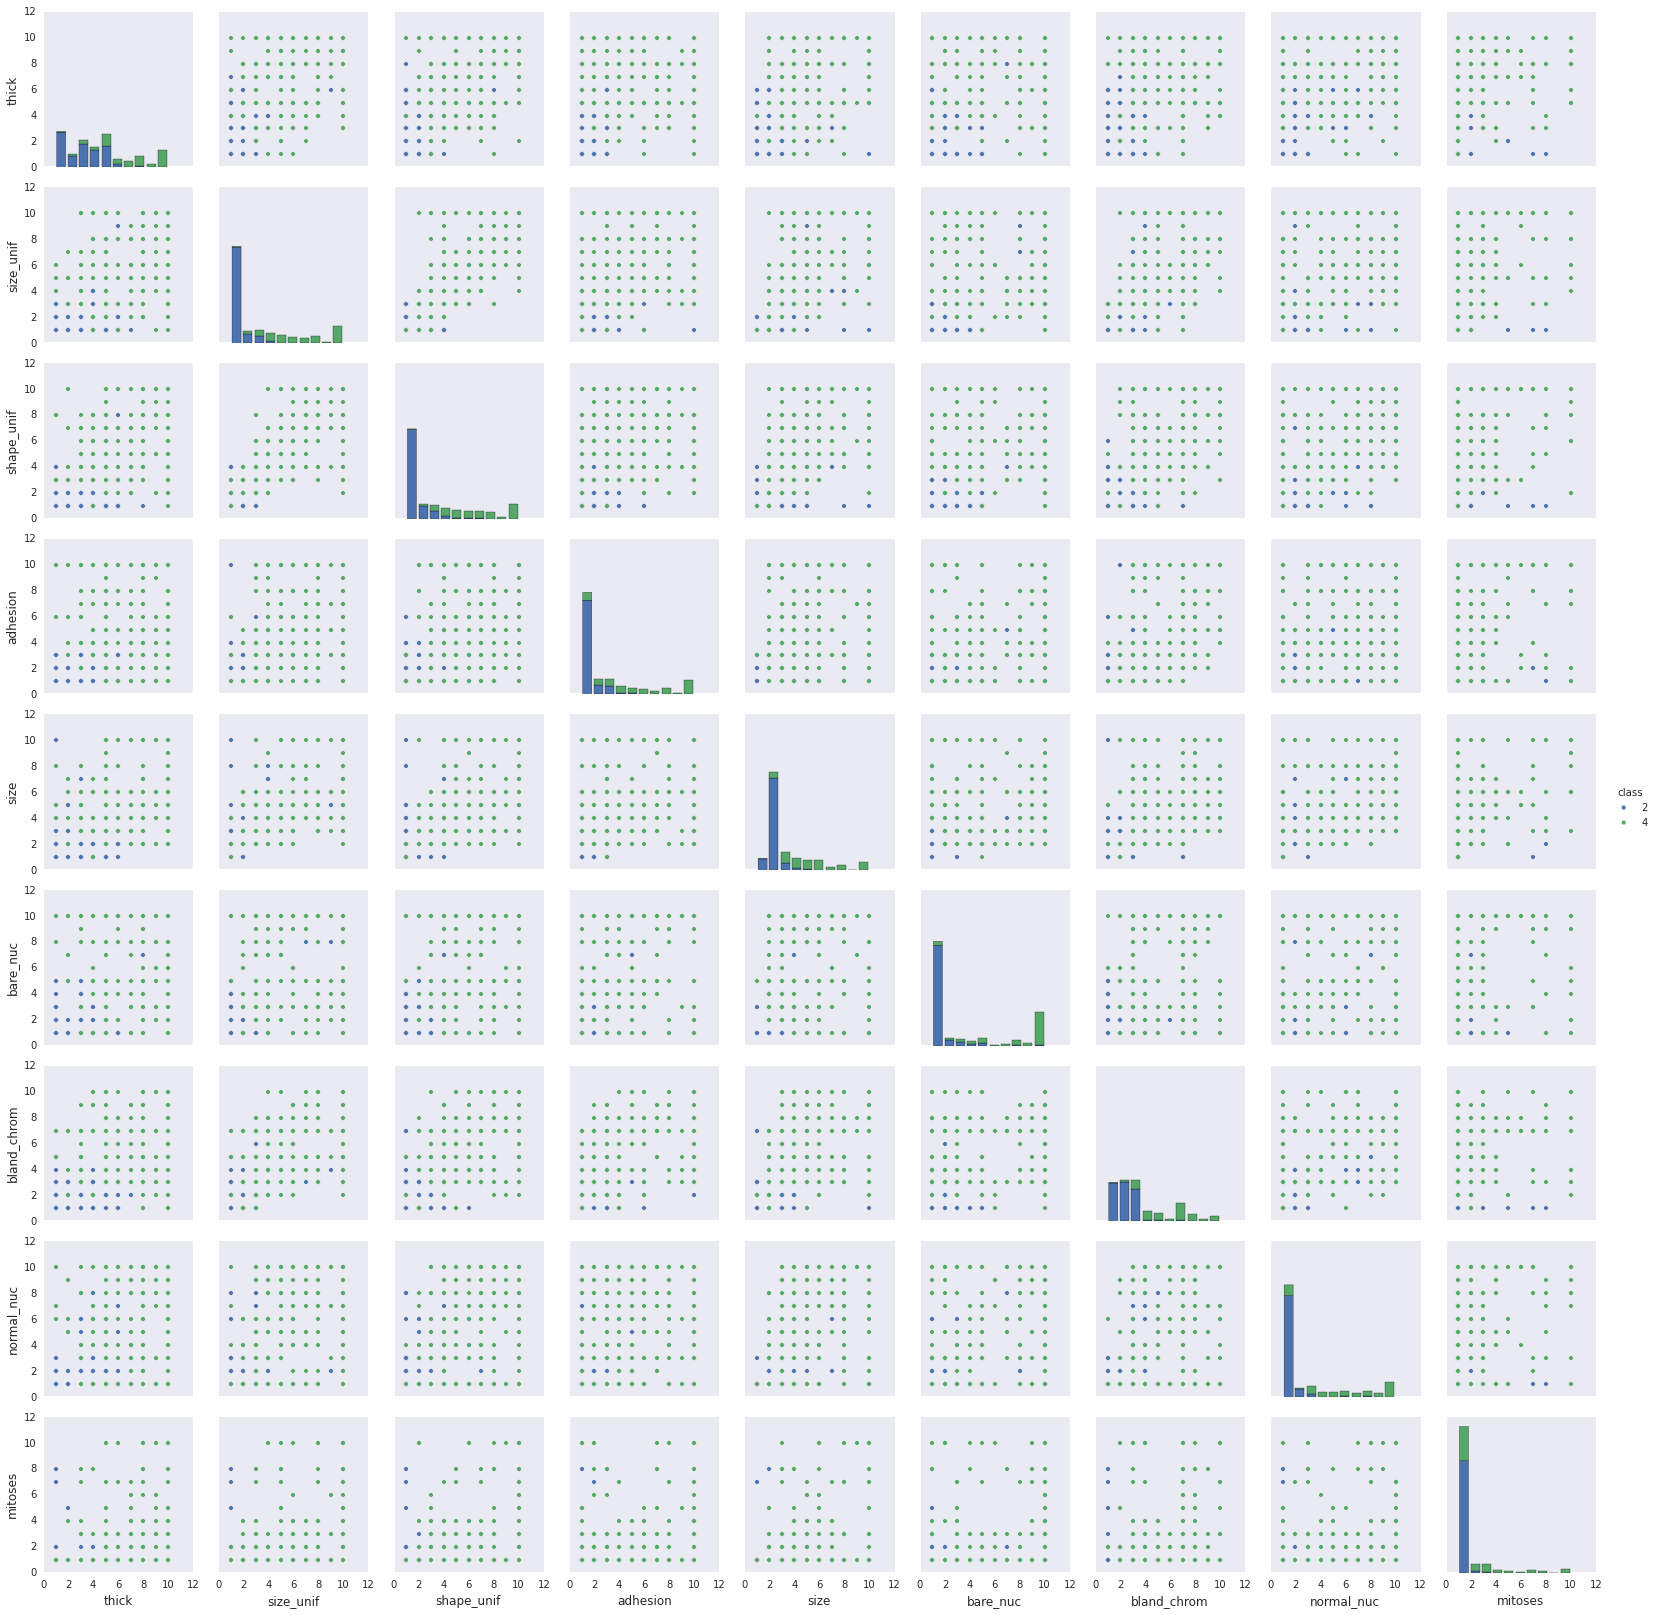

In [321]:
# now create a pairplot, and plot everything except the
# "class" column. This column will be used to 
g = sns.pairplot(dfd, hue='class', vars=dfd.columns[:-1])

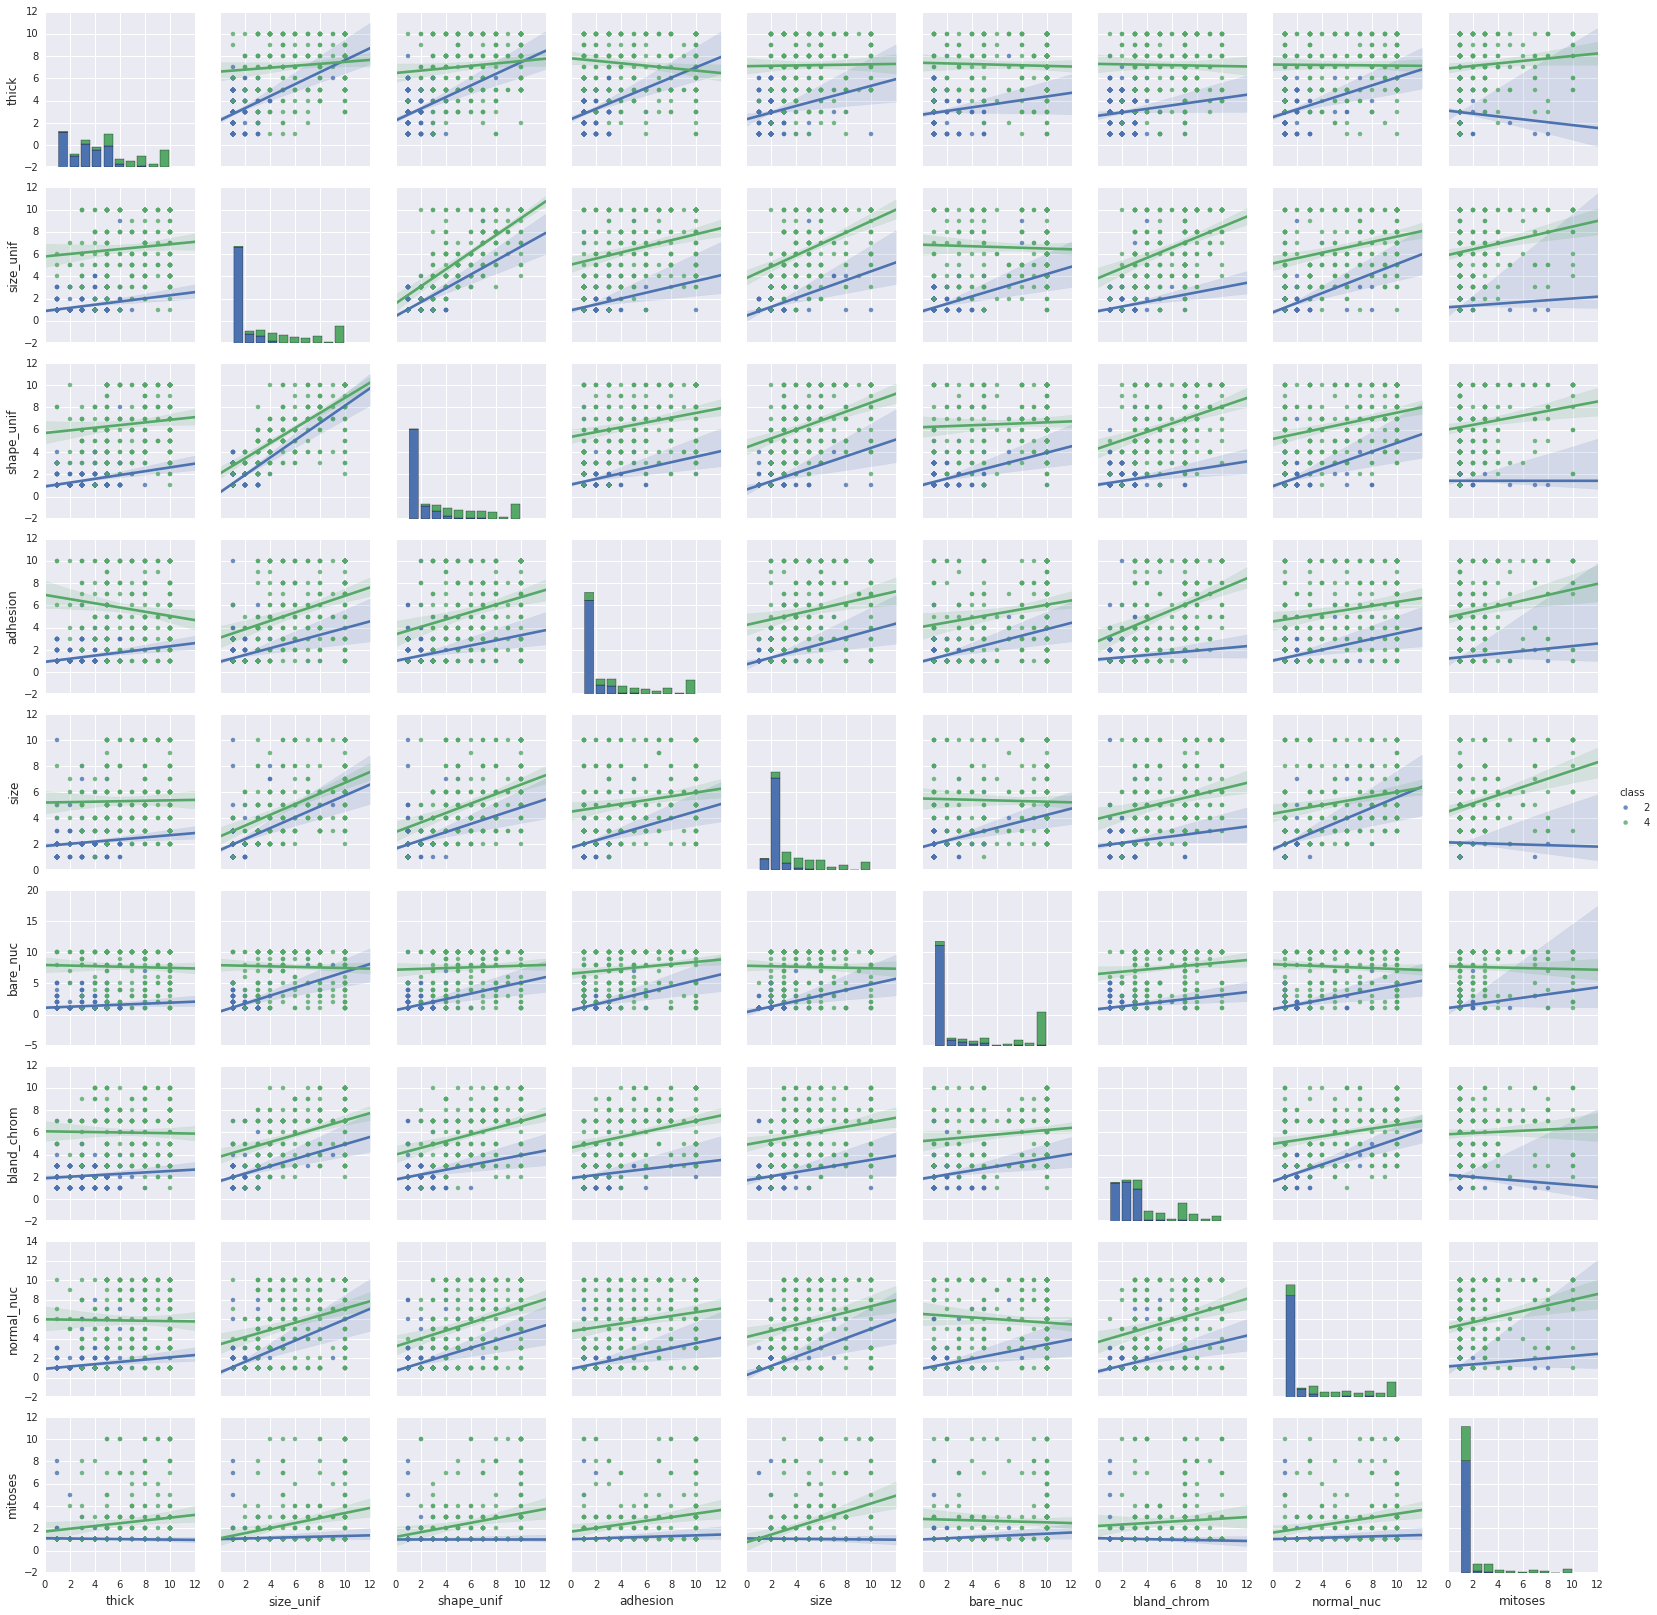

In [52]:
# add regression to off-diagonal elements
g = sns.pairplot(dfd, hue='class', vars=dfd.columns[:-1], kind='reg')

### Logistic Regression

The next step is to feed a training set into sklearn's LogisticRegression model, and use it to predict whether or not tumors are malignant or benign in a test data set.

In [322]:
features = df[cols[1:-1]]
print(features.columns)
print(len(features))

Index([u'thick', u'size_unif', u'shape_unif', u'adhesion', u'size',
       u'bare_nuc', u'bland_chrom', u'normal_nuc', u'mitoses'],
      dtype='object')
683


In [323]:
cancer = [1 if val == 4 else 0 for val in df['class'].values]
print(len(cancer))

683


In [324]:
X_train, X_test, y_train, y_test = train_test_split(
    features, cancer, test_size=0.25, random_state=42)

In [325]:
clf = LogisticRegression()

In [326]:
clf = clf.fit(X_train, y_train)

In [327]:
y_pred = clf.predict(X_test)

In [328]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [329]:
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('F1-Score: {:.3f}'.format(f1_score(y_test, y_pred)))

Accuracy: 0.947
F1-Score: 0.930


In [330]:
from sklearn.metrics import confusion_matrix

In [331]:
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]

In [332]:
cm_norm

array([[ 0.99029126,  0.00970874],
       [ 0.11764706,  0.88235294]])

In [171]:
cm_norm[0,0]

0.99029126213592233

In [236]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Negative', 'Positive'], rotation=45)
    plt.yticks(tick_marks, ['Negative', 'Positive'])
    plt.tight_layout()
    plt.text(0., 0., 'TN\n {:.1f}%'.format(cm_norm[0, 0]*1e2),
             fontdict={'size': 30., 'color': 'w'},
            verticalalignment='center',
            horizontalalignment='center')
    plt.text(1., 0., 'FP\n {:.1f}%'.format(cm_norm[0, 1]*1e2),
             fontdict={'size': 30., 'color': '#08154C'},
            verticalalignment='center',
            horizontalalignment='center')
    plt.text(0., 1., 'FN\n {:.1f}%'.format(cm_norm[1, 0]*1e2),
             fontdict={'size': 30., 'color': '#08154C'},
            verticalalignment='center',
            horizontalalignment='center')
    plt.text(1., 1., 'TP\n {:.1f}%'.format(cm_norm[1, 1]*1e2),
             fontdict={'size': 30., 'color': 'w'},
            verticalalignment='center',
            horizontalalignment='center')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


[[ 0.99029126  0.00970874]
 [ 0.11764706  0.88235294]]


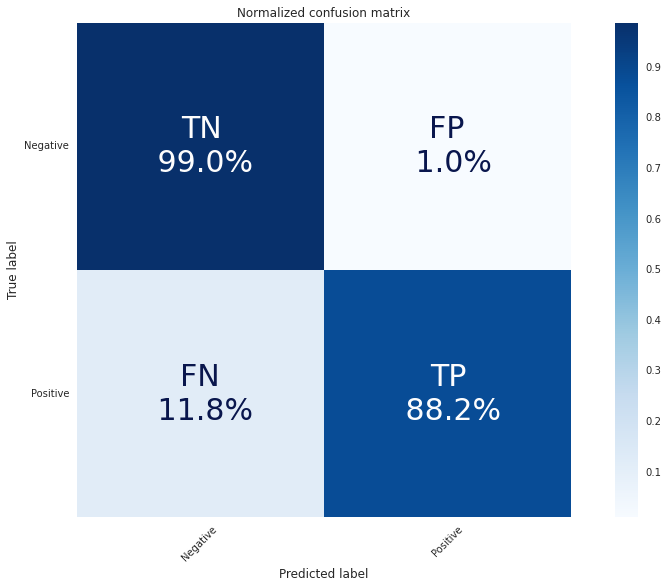

In [237]:
print(cm_norm)
plot_confusion_matrix(cm_norm, title='Normalized confusion matrix')

In [238]:
from sklearn.metrics import classification_report

In [239]:
target_names = ['Benign', 'Malignant']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

     Benign       0.93      0.99      0.96       103
  Malignant       0.98      0.88      0.93        68

avg / total       0.95      0.95      0.95       171



In [131]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

In [132]:
print(np.min(y_test))
print(np.max(y_test))

0
1


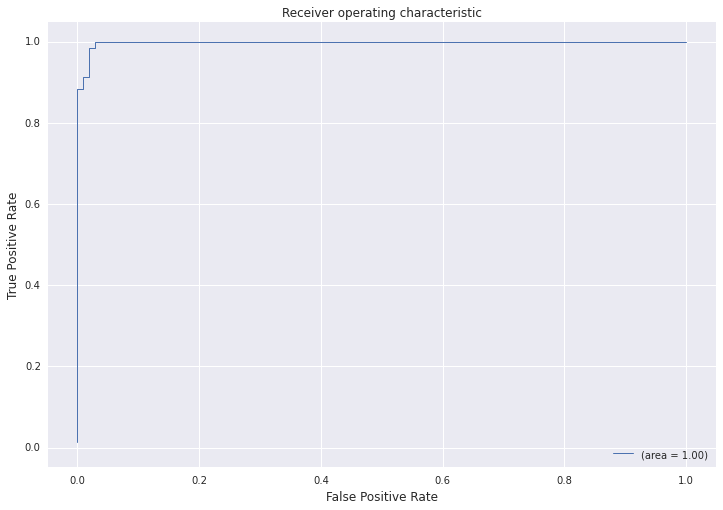

In [138]:
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
mean_tpr += interp(mean_fpr, fpr, tpr)
mean_tpr[0] = 0.0
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='(area = %0.2f)' % roc_auc)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")


The confusion matrix shows that we have really good True Negative rate (99%) and False Positive (1%) rates, and a pretty good (88%) True Positive rate. Personally, I would rather have a test that gives a higher true positive rate at the expense of a higher false positive rate, instead of a higher true negative rate. That is, I would like to increase the **recall** (the ability of the classifier to find all the positive samples) at the expense of the **precision** (the ability of the classifier not to label a negative sample as positive).

## Tuning the model by performing a grid search over the hyperparameters

In [240]:
from sklearn.grid_search import GridSearchCV

In [241]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [242]:
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(LogisticRegression(), param_grid, cv=5,
                       scoring='%s_weighted' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for precision
()
Best parameters set found on development set:
()
{'C': 10}
()
Grid scores on development set:
()
0.894 (+/-0.017) for {'C': 0.001}
0.918 (+/-0.046) for {'C': 0.01}
0.956 (+/-0.020) for {'C': 0.1}
0.965 (+/-0.027) for {'C': 1}
0.965 (+/-0.035) for {'C': 10}
0.963 (+/-0.040) for {'C': 100}
0.963 (+/-0.040) for {'C': 1000}
()
Detailed classification report:
()
The model is trained on the full development set.
The scores are computed on the full evaluation set.
()
             precision    recall  f1-score   support

          0       0.94      0.99      0.96       103
          1       0.98      0.90      0.94        68

avg / total       0.95      0.95      0.95       171

()
# Tuning hyper-parameters for recall
()
Best parameters set found on development set:
()
{'C': 1}
()
Grid scores on development set:
()
0.869 (+/-0.033) for {'C': 0.001}
0.916 (+/-0.047) for {'C': 0.01}
0.955 (+/-0.020) for {'C': 0.1}
0.965 (+/-0.027) for {'C': 1}
0.965 (+/

#### Summary

Looking at the results from an exhaustive grid search over the inverse regularization strength hyperparameter, C, there was no real improvement over the default value of 1.

### Feature Creation

The next thing I will take a look at is if we can get a better result by generating some polynomial features.

In [243]:
from sklearn.preprocessing import PolynomialFeatures

In [244]:
poly = PolynomialFeatures(3)

In [245]:
features3 = poly.fit_transform(features)

In [249]:
features.shape

(683, 9)

In [248]:
features3.shape

(683, 220)

In [260]:
X_train, X_test, y_train, y_test = train_test_split(
    features3, cancer, test_size=0.25, random_state=42)

In [261]:
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(LogisticRegression(), param_grid, cv=10,
                       scoring='%s_weighted' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for precision
()
Best parameters set found on development set:
()
{'C': 0.1}
()
Grid scores on development set:
()
0.945 (+/-0.059) for {'C': 0.001}
0.947 (+/-0.037) for {'C': 0.01}
0.949 (+/-0.040) for {'C': 0.1}
0.943 (+/-0.051) for {'C': 1}
0.943 (+/-0.051) for {'C': 10}
0.943 (+/-0.051) for {'C': 100}
0.939 (+/-0.044) for {'C': 1000}
()
Detailed classification report:
()
The model is trained on the full development set.
The scores are computed on the full evaluation set.
()
             precision    recall  f1-score   support

          0       0.91      0.97      0.94       103
          1       0.95      0.85      0.90        68

avg / total       0.93      0.92      0.92       171

()
# Tuning hyper-parameters for recall
()
Best parameters set found on development set:
()
{'C': 0.1}
()
Grid scores on development set:
()
0.943 (+/-0.060) for {'C': 0.001}
0.945 (+/-0.039) for {'C': 0.01}
0.947 (+/-0.040) for {'C': 0.1}
0.941 (+/-0.050) for {'C': 1}
0.941 

In [254]:
poly = PolynomialFeatures(2)

In [255]:
features2 = poly.fit_transform(features)

In [256]:
features2.shape

(683, 55)

In [263]:
X_train, X_test, y_train, y_test = train_test_split(
    features2, cancer, test_size=0.25, random_state=42)

In [259]:
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(LogisticRegression(), param_grid, cv=10,
                       scoring='%s_weighted' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for precision
()
Best parameters set found on development set:
()
{'C': 0.1}
()
Grid scores on development set:
()
0.951 (+/-0.036) for {'C': 0.001}
0.953 (+/-0.050) for {'C': 0.01}
0.955 (+/-0.044) for {'C': 0.1}
0.943 (+/-0.044) for {'C': 1}
0.931 (+/-0.039) for {'C': 10}
0.928 (+/-0.047) for {'C': 100}
0.925 (+/-0.044) for {'C': 1000}
()
Detailed classification report:
()
The model is trained on the full development set.
The scores are computed on the full evaluation set.
()
             precision    recall  f1-score   support

          0       0.95      0.98      0.97       103
          1       0.97      0.93      0.95        68

avg / total       0.96      0.96      0.96       171

()
# Tuning hyper-parameters for recall
()
Best parameters set found on development set:
()
{'C': 0.1}
()
Grid scores on development set:
()
0.949 (+/-0.036) for {'C': 0.001}
0.951 (+/-0.050) for {'C': 0.01}
0.953 (+/-0.044) for {'C': 0.1}
0.941 (+/-0.046) for {'C': 1}
0.928 

In [262]:
clf = LogisticRegression(C=0.1)

In [264]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [265]:
y_pred = clf.predict(X_test)

In [266]:
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
print(cm_norm)

[[ 0.98058252  0.01941748]
 [ 0.07352941  0.92647059]]


[[ 0.98058252  0.01941748]
 [ 0.07352941  0.92647059]]


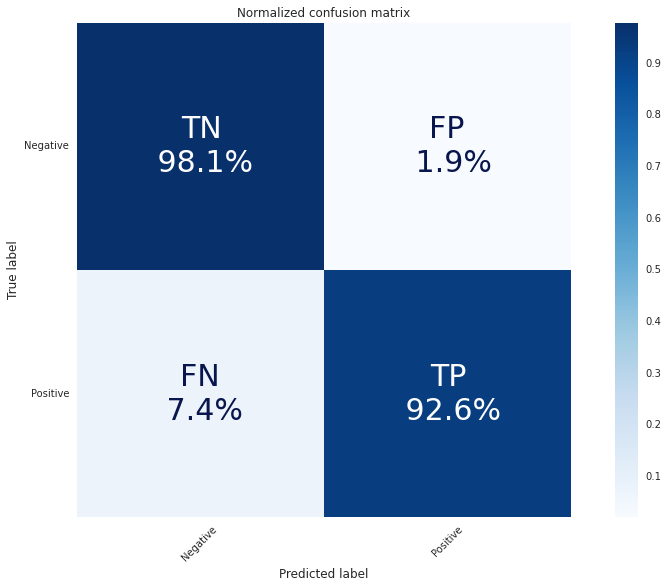

In [267]:
print(cm_norm)
plot_confusion_matrix(cm_norm, title='Normalized confusion matrix')

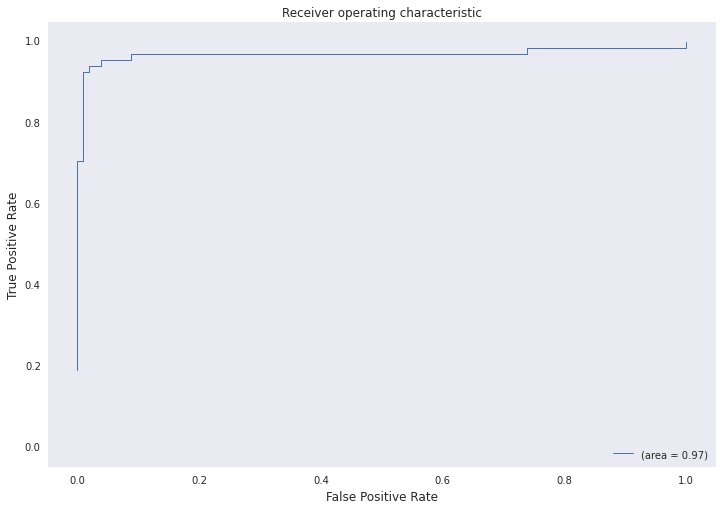

In [268]:
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
mean_tpr += interp(mean_fpr, fpr, tpr)
mean_tpr[0] = 0.0
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='(area = %0.2f)' % roc_auc)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")


### Plotting the Probabilities

The ROC curve showed that we can get just about all  True Positives if we increase our false positive rate by only a small amount. In this section, I use the `predict_proba` method to tailor the threshold to increase the true positive rate.

In [271]:
X_train, X_test, y_train, y_test = train_test_split(
    features, cancer, test_size=0.25, random_state=42)

In [272]:
clf = clf.fit(X_train, y_train)

In [333]:
y_proba = clf.predict_proba(X_test)

In [334]:
y_proba_1 = np.array([a[1] for a in y_proba])

In [335]:
y_test_npa = np.array(y_test)

In [347]:
#y_test_npa == 1

In [337]:
y_proba_bads = y_proba_1[y_test_npa == 1]
y_proba_goods = y_proba_1[y_test_npa == 0]
print(len(y_test))
print(len(y_proba_1))
print(len(y_proba_bads))
print(len(y_proba_goods))

171
171
68
103


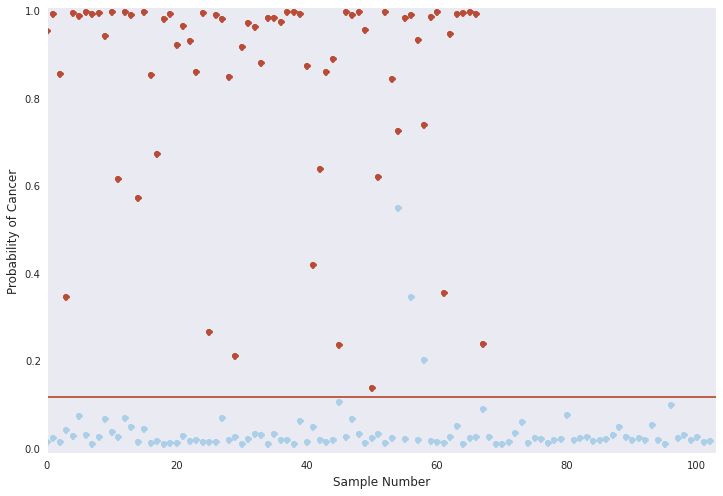

In [346]:
plt.plot(range(len(y_proba_bads)), y_proba_bads, 'o', c='#BA4C37')
plt.plot(range(len(y_proba_goods)), y_proba_goods, 'o', c='#ABCEE9')
plt.plot([0,103], [.12, .12], c='#BA4C37')
plt.xlim([0, 103])
plt.ylim([-0.01, 1.01])
plt.ylabel('Probability of Cancer')
plt.xlabel('Sample Number')

In [350]:
y_custom_pred = [1 if y > 0.12 else 0 for y in y_proba_1]

[[ 0.97087379  0.02912621]
 [ 0.          1.        ]]
[[ 0.97087379  0.02912621]
 [ 0.          1.        ]]


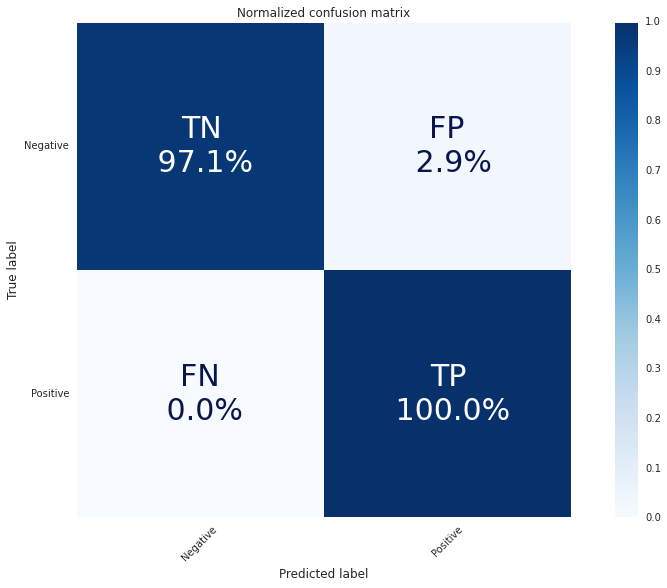

In [354]:
cm = confusion_matrix(y_test, y_custom_pred)
cm_norm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
print(cm_norm)
print(cm_norm)
plot_confusion_matrix(cm_norm, title='Normalized confusion matrix')